In [2]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.frequent_patterns import apriori, association_rules
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [14]:
data = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Unifild csv files\drugs_side_effects_drugs_com.csv")
data.head(5)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [16]:
data.shape

(2931, 17)

Data Preprocessing


In [18]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
print("column:", data.columns)

The dataset has 2931 rows and 17 columns
column: Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [20]:
# Dropping the 'brand_names' column and delete from dataset
data.drop(columns=['brand_names'], inplace=True)

In [22]:
# Find duplicate rows based on all columns
duplicate_rows= data[data.duplicated()]

#Count the duplicated rows
duplicate_count = duplicate_rows.shape[0] 

# Print the count of duplicate rows
print("Count of Duplicate Rows:", duplicate_count) 
print(duplicate_rows) # Print the duplicate rows

Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url]
Index: []


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   activity                       2931 non-null   object 
 6   rx_otc                         2930 non-null   object 
 7   pregnancy_category             2702 non-null   object 
 8   csa                            2931 non-null   object 
 9   alcohol                        1377 non-null   object 
 10  related_drugs                  1462 non-null   object 
 11  medical_condition_description  2931 non-null   object 
 12  rating                         1586 non-null   f

In [26]:
# Print the total number of missing values
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

There are 6192 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [28]:
# In the alcohol column we have X and null (NaN) values
# Replace X with 1 as alcohol interaction, NaN with 0 as no interaction
data['alcohol']=data['alcohol'].replace(np.NaN,'0')
data['alcohol']=data['alcohol'].replace({'X': 1})

# Fill the null values in 'side_effects', 'generic_name', 'drug_classes', 'related_drugs', 'pregnancy_category', and 'rx_otc' with Unknown
data["side_effects"] = data['side_effects'].fillna('Unknown')
data["related_drugs"] = data['related_drugs'].fillna('Unknown')
data['generic_name']=data['generic_name'].replace(np.NaN,'Unknown')
data['drug_classes']=data['drug_classes'].replace(np.NaN,'Unknown')
data['rx_otc']=data['rx_otc'].replace(np.NaN, 'Unknown')
data['pregnancy_category']=data['pregnancy_category'].replace(np.NaN, 'Unknown')

# Change the null values with 0 as a base for 'rating' and 'no_of_reviews' columns
# It will show that there are no information about it
data["rating"] = data['rating'].fillna('0')
data["no_of_reviews"] = data['no_of_reviews'].fillna('0')

In [30]:
# Convert 'activity' to string, remove whitespace and '%' character, then convert to float and divide by 100
data['activity'] = data['activity'].astype(str).str.replace(r'\s+', '', regex=True).str.rstrip('%')
data['activity'] = pd.to_numeric(data['activity'], errors='coerce')/100

# Convert 'no_of_reviews' to numeric, setting errors='coerce' to handle invalid parsing
data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')

# Display the updated DataFrame
data=data.copy()
print(data.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [32]:
# Let's check if there are still missing values
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

There are 0 missing values in this dataset
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 0
	no_of_reviews: 0
	drug_link: 0
	medical_condition_url: 0


In [34]:
# Create a copy of the DataFrame
data_ver2 = data.copy()
print(data_ver2.head())

# Save the data
data_ver2.to_csv('drugs_side_effects_drugs_com_version_2.csv', index=False)

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [36]:
# Read the new version dataset
data_ver3=pd.read_csv('drugs_side_effects_drugs_com_version_2.csv')

# Show the types of categories
data_ver3["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', 'Unknown', 'A'], dtype=object)

In [38]:
data_ver3["csa"].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [40]:
data_ver3["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', 'Unknown'], dtype=object)

In [42]:
data_ver3["generic_name"].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      dtype=object)

In [44]:
data_ver3["medical_condition"].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [46]:
# Encode categorical variables as numerical values
label_encoder = LabelEncoder()
data_ver3["csa"]=label_encoder.fit_transform(data_ver3["csa"])
data_ver3["rx_otc"]=label_encoder.fit_transform(data_ver3["rx_otc"])
data_ver3["generic_name"] = label_encoder.fit_transform(data_ver3["generic_name"])
data_ver3["medical_condition"] = label_encoder.fit_transform(data_ver3["medical_condition"])
data_ver3["pregnancy_category"] = label_encoder.fit_transform(data_ver3["pregnancy_category"])
data_ver3["side_effects"] = label_encoder.fit_transform(data_ver3["side_effects"])

In [48]:
# Save the data
data_ver3.to_csv('drugs_side_effects_drugs_com_version_3.csv', index=False)
 
df_for_heatmap=pd.DataFrame(data_ver3,columns=('generic_name', 'activity', 'medical_condition', 'no_of_reviews', 'side_effects', 'rating', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol'))
df_for_heatmap.head(10)

# Save the dataframe 
df_for_heatmap.to_csv('dataframe_for_heatmap.csv', index=False)

In [50]:
scaler=StandardScaler()
scaler.fit(df_for_heatmap)
scaled_data=scaler.transform(df_for_heatmap)
print(scaled_data)

[[-0.11111578  4.63956139 -1.43400434 ...  0.28892455 -0.17025661
   1.06232778]
 [ 1.50040103  4.34423469 -1.43400434 ... -0.43301735 -0.17025661
   1.06232778]
 [ 0.89479917  2.33601309 -1.43400434 ...  0.28892455 -0.17025661
  -0.94132905]
 ...
 [ 1.21043065 -0.49912329  1.82918864 ... -0.43301735 -0.17025661
   1.06232778]
 [ 1.47217383 -0.49912329  1.82918864 ...  1.73280834 -0.17025661
  -0.94132905]
 [ 1.47217383 -0.49912329  1.82918864 ...  1.73280834 -0.17025661
  -0.94132905]]


In [52]:
df_std = pd.DataFrame(scaler.fit_transform(df_for_heatmap), columns=df_for_heatmap.columns)
print(df_std)

      generic_name  activity  medical_condition  no_of_reviews  side_effects  \
0        -0.111116  4.639561          -1.434004       5.101198     -1.678954   
1         1.500401  4.344235          -1.434004       2.895869      0.778579   
2         0.894799  2.336013          -1.434004       3.129875      1.689009   
3         0.558639  1.922556          -1.434004       4.129719      1.529527   
4        -0.462673  1.804425          -1.434004       0.747269     -0.115526   
...            ...       ...                ...            ...           ...   
2926     -0.832193 -0.380993           1.829189      -0.167481      0.757231   
2927      0.112136 -0.440058           1.829189      -0.288030      0.370455   
2928      1.210431 -0.499123           1.829189      -0.288030     -1.029724   
2929      1.472174 -0.499123           1.829189      -0.288030     -1.175392   
2930      1.472174 -0.499123           1.829189      -0.288030      0.444545   

        rating       csa  pregnancy_cat

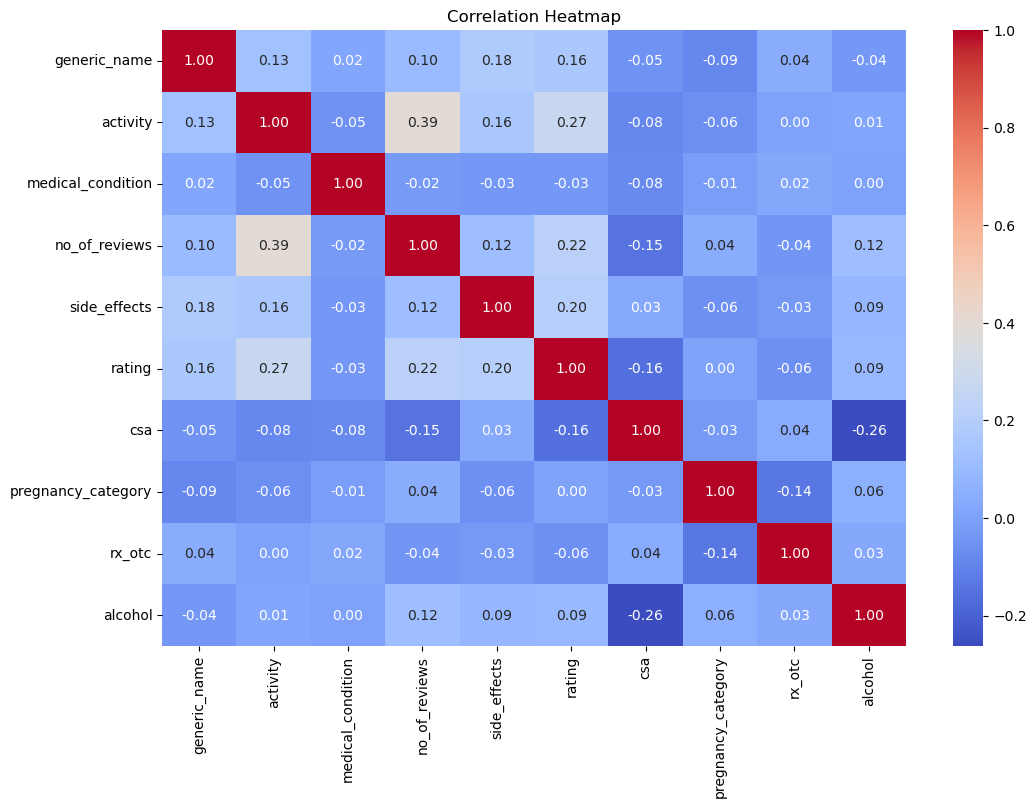

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_std.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [56]:
# Read the 2nd version dataset
data_ver4 = pd.read_csv('drugs_side_effects_drugs_com_version_2.csv')

# Check occurrence and frequency of medical conditions (from highest to lowest)
medical_condition_counts = data_ver4['medical_condition'].value_counts().sort_values(ascending=False)
print("\nMedical condition occurrence and frequency:")
print(medical_condition_counts)


Medical condition occurrence and frequency:
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Angina                   71
Bronchitis               71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Anxiety                  45
Cholesterol              45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD                     23
IBD (Bowel)  

In [ ]:
# Save the results into separate CSV file
medical_condition_counts.to_csv('medical_condition_counts.csv')

In [58]:
# Function to extract side effects from text, split by semicolons
def extract_side_effects(text):
    return [effect.strip() for effect in re.split(r'[;]', text)]

# Extract and count occurrences of side effects
side_effects = data_ver4['side_effects'].dropna().apply(extract_side_effects).explode()
side_effect_counts = side_effects.value_counts().sort_values(ascending=False)

print("\nSide effects occurrence and frequency:")
print(side_effect_counts)


Side effects occurrence and frequency:
side_effects
hives                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [60]:
# Function to extract drug classes from text
# As we did in the previous step
def extract_drug_classes(text):
    return [effect.strip() for effect in re.split(r'[,]', text)]

drug_classes = data_ver4['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts = drug_classes.value_counts().sort_values(ascending=False)

print("\nDrug Classes occurrence and frequency:")
print(drug_classes_counts)


Drug Classes occurrence and frequency:
drug_classes
Upper respiratory combinations           245
Topical acne agents                      125
Topical steroids                          94
Antihistamines                            82
Unknown                                   82
                                        ... 
Immune globulins                           1
Smoking cessation agents                   1
Mouth and throat products                  1
Skeletal muscle relaxant combinations      1
Anthelmintics                              1
Name: count, Length: 244, dtype: int64


In [62]:
# Define functions to check for specific side effects and create new boolean columns
def has_hives(text):
    return 'hives' in text.lower()
data_ver4['Hives'] = data_ver4['side_effects'].apply(has_hives)

def has_difficult_breathing(text):
    return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
data_ver4['Difficult Breathing'] = data_ver4['side_effects'].apply(has_difficult_breathing)

def has_itching(text):
    return 'itching' in text.lower()
data_ver4['Itching'] = data_ver4['side_effects'].apply(has_itching)

In [64]:
# For specific drug classes
def is_usc(text):
    return 'Upper respiratory combinations' in text
data_ver4['Upper respiratory combinations'] = data_ver4['drug_classes'].apply(is_usc)

def is_steriods(text):
    return 'Topical steroids' in text
data_ver4['Topical steroids'] = data_ver4['drug_classes'].apply(is_steriods)

def is_acne(text):
    return 'Topical acne agents' in text
data_ver4['Topical acne agents'] = data_ver4['drug_classes'].apply(is_acne)

In [66]:
# For specific medical conditions
def has_pain(text):
    return 'Pain' in text
data_ver4['Pain'] = data_ver4['medical_condition'].apply(has_pain)

def has_colds_and_flu(text):
    return 'Colds & Flu' in text
data_ver4['Colds & Flu'] = data_ver4['medical_condition'].apply(has_colds_and_flu)

def has_acne(text):
    return 'Acne' in text
data_ver4['Acne'] = data_ver4['medical_condition'].apply(has_acne)

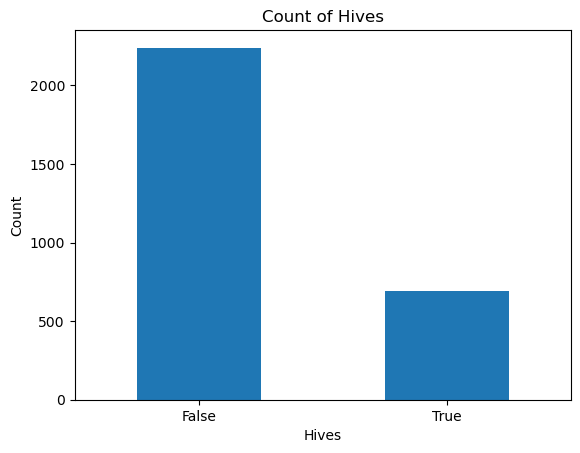

In [68]:
# Plot count of Hives
data_ver4['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

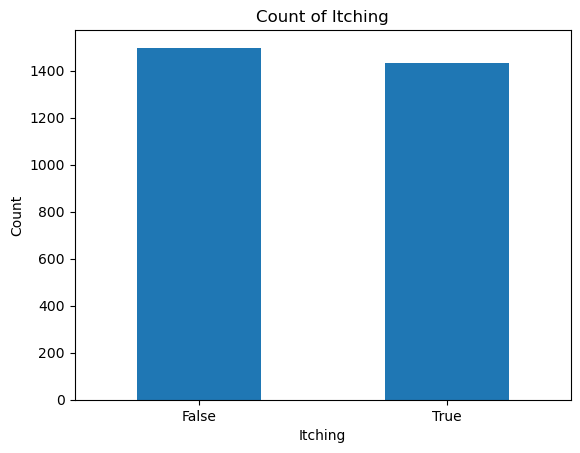

In [70]:
# Plot count of Itching
data_ver4['Itching'].value_counts().plot(kind='bar')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

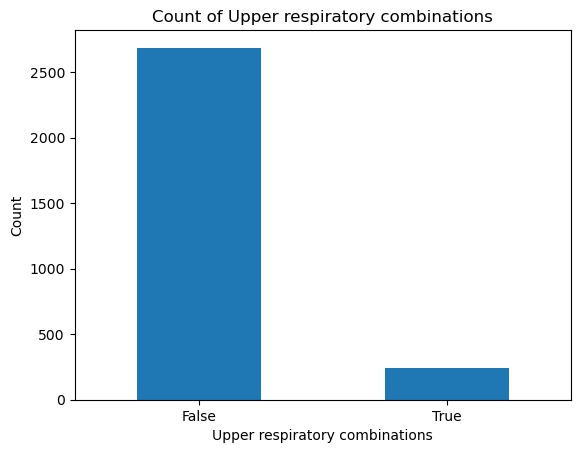

In [72]:
# Plot the count of occurrences for each drug class
# Plot count of Upper respiratory combinations
data_ver4['Upper respiratory combinations'].value_counts().plot(kind='bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

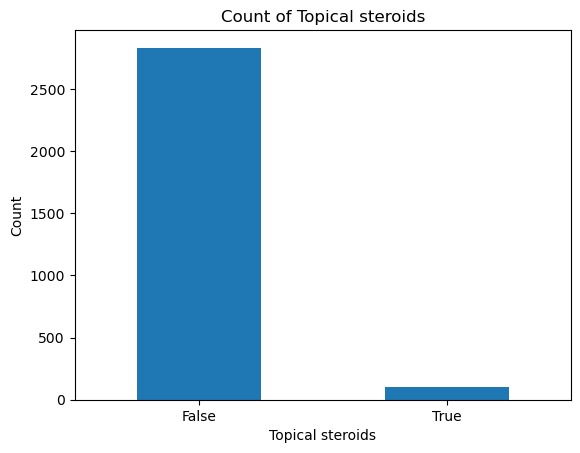

In [74]:
# Plot count of Topical steroids
data_ver4['Topical steroids'].value_counts().plot(kind='bar')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

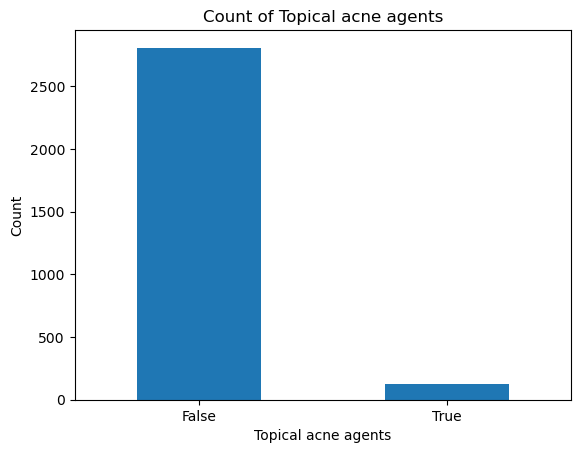

In [76]:
# Plot count of Topical acne agents
data_ver4['Topical acne agents'].value_counts().plot(kind='bar')
plt.title('Count of Topical acne agents')
plt.xlabel('Topical acne agents')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

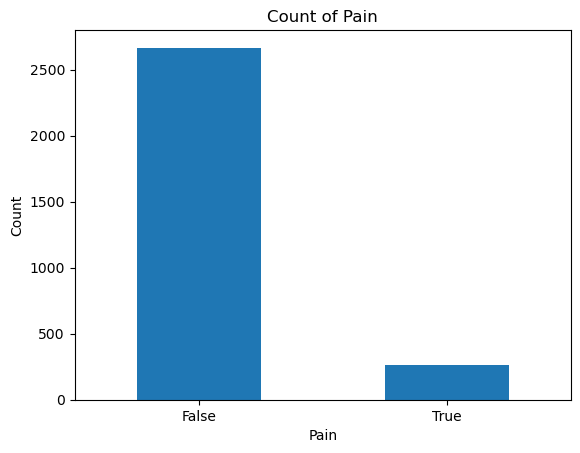

In [78]:
# Plot the count of occurrences for each medical condition
# Plot count of Pain
data_ver4['Pain'].value_counts().plot(kind='bar')
plt.title('Count of Pain')
plt.xlabel('Pain')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

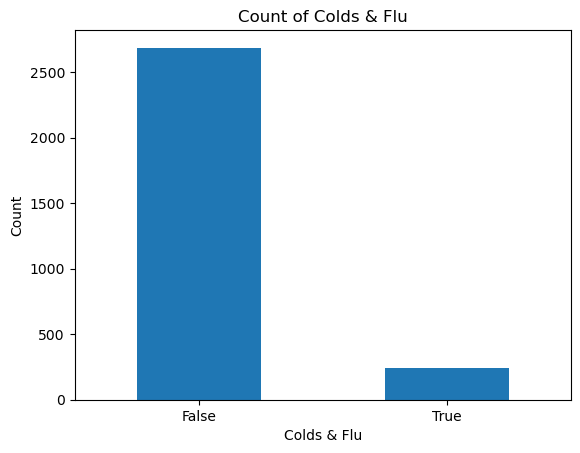

In [80]:
# Plot count of Colds & Flu
data_ver4['Colds & Flu'].value_counts().plot(kind='bar')
plt.title('Count of Colds & Flu')
plt.xlabel('Colds & Flu')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

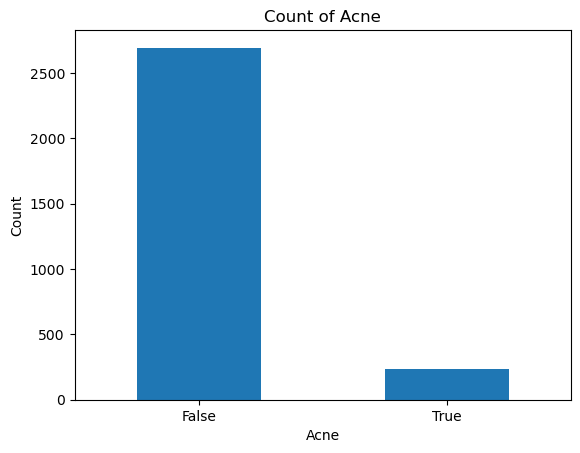

In [82]:
# Plot count of Acne
data_ver4['Acne'].value_counts().plot(kind='bar')
plt.title('Count of Acne')
plt.xlabel('Acne')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

In [84]:
# Save the data
data_ver4.to_csv('drugs_side_effects_drugs_com_version_4.csv', index=False)
data_ver5=data_ver4.copy()

In [86]:
# Columns for ARM
columns_to_show = ['Hives', 'Difficult Breathing', 'Itching', 
                   'Upper respiratory combinations', 'Topical steroids', 
                   'Topical acne agents', 'Pain', 'Colds & Flu', 'Acne']

data_ver4_subset = data_ver4[columns_to_show]

# Display a few rows of the subset DataFrame
print("\nA few rows of the subset DataFrame:")
print(data_ver4_subset.iloc[900:910])


A few rows of the subset DataFrame:
     Hives  Difficult Breathing  Itching  Upper respiratory combinations  \
900   True                False     True                            True   
901   True                 True    False                            True   
902   True                False     True                            True   
903   True                False     True                            True   
904   True                 True     True                            True   
905   True                False     True                            True   
906   True                 True    False                            True   
907   True                 True     True                            True   
908  False                False    False                            True   
909  False                False    False                            True   

     Topical steroids  Topical acne agents   Pain  Colds & Flu   Acne  
900             False                False  False     

In [88]:
# Convert new created columns to boolean
bool_columns = ['Hives', 'Difficult Breathing', 'Itching', 
                'Upper respiratory combinations', 'Topical steroids', 
                'Topical acne agents', 'Pain', 'Colds & Flu', 'Acne']

for col in bool_columns:
    data_ver4[col] = data_ver4[col].astype(bool)

# Create new columns for combined drug classes and medical conditions with 'T' and 'F'
data_ver4['DrugClass_MedCondition'] = (
    data_ver4['Upper respiratory combinations'].replace({True: 'T', False: 'F'}) + 
    data_ver4['Topical steroids'].replace({True: 'T', False: 'F'}) + 
    data_ver4['Topical acne agents'].replace({True: 'T', False: 'F'}) + 
    data_ver4['Pain'].replace({True: 'T', False: 'F'}) +
    data_ver4['Colds & Flu'].replace({True: 'T', False: 'F'}) +
    data_ver4['Acne'].replace({True: 'T', False: 'F'})
)

# Verify the creation of the new column
print("\First few rows of the DataFrame with the combined column:")
print(data_ver4[['DrugClass_MedCondition']].head())

\First few rows of the DataFrame with the combined column:
  DrugClass_MedCondition
0                 FFFFFT
1                 FFFFFT
2                 FFFFFT
3                 FFFFFT
4                 FFTFFT


<>:20: SyntaxWarning: invalid escape sequence '\F'
<>:20: SyntaxWarning: invalid escape sequence '\F'
C:\Users\hp\AppData\Local\Temp\ipykernel_18612\1040015704.py:20: SyntaxWarning: invalid escape sequence '\F'
  print("\First few rows of the DataFrame with the combined column:")


In [90]:
# Filter out rows where DrugClass_MedCondition has fewer than 2 'T's
data_ver4 = data_ver4[data_ver4['DrugClass_MedCondition'].str.count('T') >= 2]

# Verify the creation
print("\nFirst few rows of the DataFrame with the new combined column with at least two T's:")
print(data_ver4[['DrugClass_MedCondition']].head())


First few rows of the DataFrame with the new combined column with at least two T's:
   DrugClass_MedCondition
4                  FFTFFT
6                  FFTFFT
9                  FFTFFT
10                 FFTFFT
11                 FFTFFT


In [92]:
# One-hot encode the combined column and the side effects
data_ver4_subset = pd.get_dummies(data_ver4[['DrugClass_MedCondition', 'Hives', 'Difficult Breathing', 'Itching']])
data_ver4_subset.head()

,Hives,Difficult Breathing,Itching,DrugClass_MedCondition_FFTFFT,DrugClass_MedCondition_TFFFTF
4,True,True,True,True,False
6,True,True,True,True,False
9,True,True,False,True,False
10,True,True,False,True,False
11,True,True,True,True,False


In [94]:
# Apply the Apriori algorithm
freq_items = apriori(data_ver4_subset, min_support=0.2, use_colnames=True, verbose=1)

# Generate the association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)

# Filter rules to have DrugClass_MedCondition as antecedents and side effects as consequents
side_effects = {'Hives', 'Difficult Breathing', 'Itching'}
rules_filtered = rules[
    rules['antecedents'].apply(lambda x: any(item.startswith('DrugClass_MedCondition_') for item in x) and not any(item in side_effects for item in x)) &
    rules['consequents'].apply(lambda x: any(item in side_effects for item in x) and len(x) == 1)
]

print(rules_filtered.head(30))

Processing 5 combinations | Sampling itemset size 54
                        antecedents            consequents  \
4   (DrugClass_MedCondition_FFTFFT)                (Hives)   
5   (DrugClass_MedCondition_TFFFTF)                (Hives)   
9   (DrugClass_MedCondition_FFTFFT)  (Difficult Breathing)   
11  (DrugClass_MedCondition_TFFFTF)  (Difficult Breathing)   
12  (DrugClass_MedCondition_FFTFFT)              (Itching)   
14  (DrugClass_MedCondition_TFFFTF)              (Itching)   

    antecedent support  consequent support   support  confidence      lift  \
4             0.379939            0.939210  0.340426    0.896000  0.953994   
5             0.620061            0.939210  0.598784    0.965686  1.028190   
9             0.379939            0.702128  0.258359    0.680000  0.968485   
11            0.620061            0.702128  0.443769    0.715686  1.019311   
12            0.379939            0.729483  0.349544    0.920000  1.261167   
14            0.620061            0.729483  

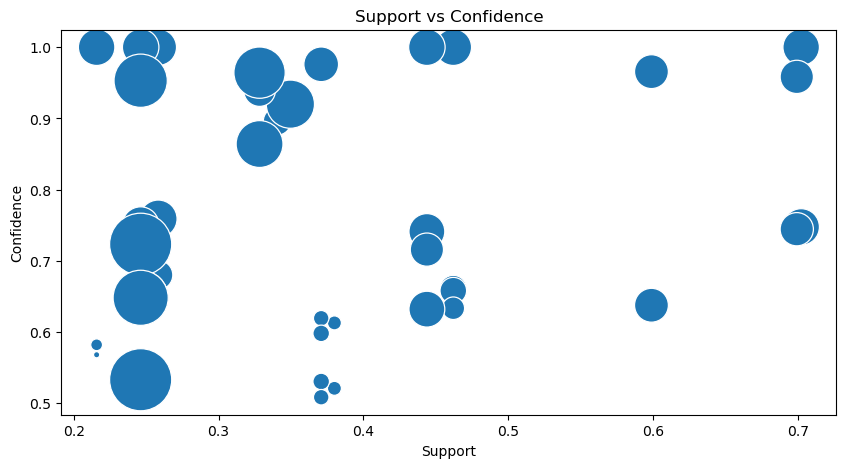

In [96]:
# Create the scatter plot for support vs confidence
plt.figure(figsize=(10, 5))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 2000))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [98]:
# Define the function to create the 'Drug Class' column
def classify_drug(row):
    if row['Upper respiratory combinations'] == 1:
        return 'URC'
    else:
        return 'Non-URC'

# Apply the function to create the new 'Drug Class' column
data_ver5['Drug Class'] = data_ver5.apply(classify_drug, axis=1)

# Print a few rows to verify the new column
print(data_ver5.iloc[900:910])


                                           drug_name medical_condition  \
900                                      Deltuss DMX       Colds & Flu   
901             dexbrompheniramine / pseudoephedrine       Colds & Flu   
902    dextromethorphan / phenylephrine / pyrilamine       Colds & Flu   
903  dextromethorphan / phenylephrine / triprolidine       Colds & Flu   
904               Diabetic Tussin Night Time Formula       Colds & Flu   
905                                          Dologen       Colds & Flu   
906                       doxylamine / phenylephrine       Colds & Flu   
907               Dristan Cold Multi Symptom Formula       Colds & Flu   
908                                          Flutabs       Colds & Flu   
909                        ibuprofen / phenylephrine       Colds & Flu   

                                          side_effects  \
900  WARNING/CAUTION: Even though it may be rare, s...   
901  hives ; difficulty breathing; swelling of your...   
902  WARNIN

In [100]:
# List of columns those are needed for classification
new_columns = ['drug_name','Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne',  'Drug Class']

# Create a new DataFrame with only the columns you want to show
data_ver5_subset = data_ver5[new_columns]

# Display a few rows of the subset DataFrame
print("\nA few rows of the subset DataFrame:")
print(data_ver5_subset.iloc[900:910])


A few rows of the subset DataFrame:
                                           drug_name  Hives  \
900                                      Deltuss DMX   True   
901             dexbrompheniramine / pseudoephedrine   True   
902    dextromethorphan / phenylephrine / pyrilamine   True   
903  dextromethorphan / phenylephrine / triprolidine   True   
904               Diabetic Tussin Night Time Formula   True   
905                                          Dologen   True   
906                       doxylamine / phenylephrine   True   
907               Dristan Cold Multi Symptom Formula   True   
908                                          Flutabs  False   
909                        ibuprofen / phenylephrine  False   

     Difficult Breathing  Itching   Pain  Colds & Flu   Acne Drug Class  
900                False     True  False         True  False        URC  
901                 True    False  False         True  False        URC  
902                False     True  False       

In [102]:
print(data_ver5_subset.columns)

Index(['drug_name', 'Hives', 'Difficult Breathing', 'Itching', 'Pain',
       'Colds & Flu', 'Acne', 'Drug Class'],
      dtype='object')


In [104]:
Y = data_ver5_subset['Drug Class']
X = data_ver5_subset.drop(['drug_name', 'Drug Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

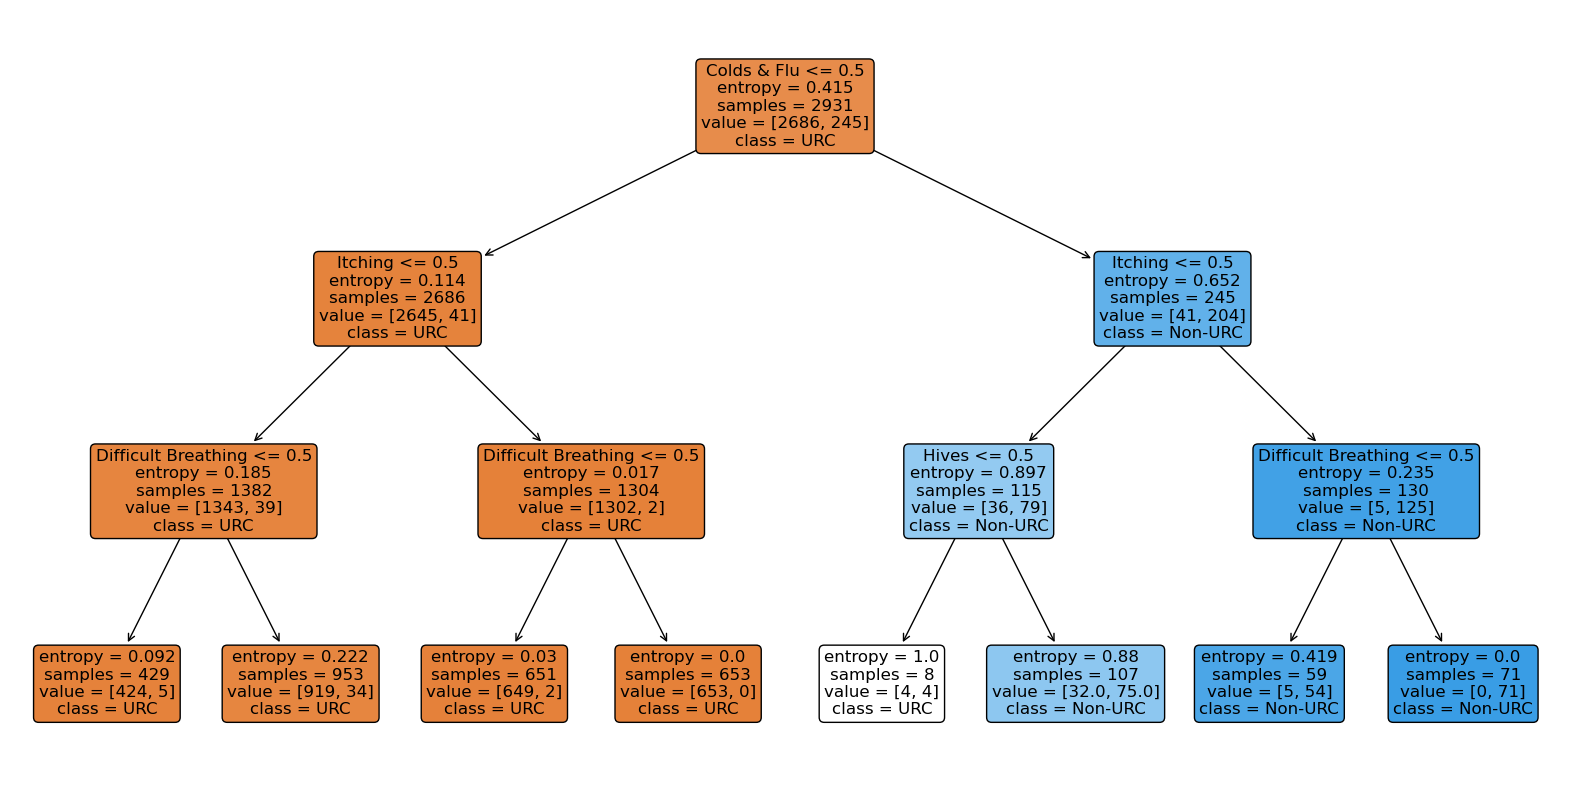

In [106]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=['Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne'], class_names=['URC', 'Non-URC'], filled=True, rounded=True, fontsize=12)
plt.show()

In [108]:
tree_rules = export_text(clf, feature_names=['Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne'])
print(tree_rules)

|--- Colds & Flu <= 0.50
|   |--- Itching <= 0.50
|   |   |--- Difficult Breathing <= 0.50
|   |   |   |--- class: Non-URC
|   |   |--- Difficult Breathing >  0.50
|   |   |   |--- class: Non-URC
|   |--- Itching >  0.50
|   |   |--- Difficult Breathing <= 0.50
|   |   |   |--- class: Non-URC
|   |   |--- Difficult Breathing >  0.50
|   |   |   |--- class: Non-URC
|--- Colds & Flu >  0.50
|   |--- Itching <= 0.50
|   |   |--- Hives <= 0.50
|   |   |   |--- class: Non-URC
|   |   |--- Hives >  0.50
|   |   |   |--- class: URC
|   |--- Itching >  0.50
|   |   |--- Difficult Breathing <= 0.50
|   |   |   |--- class: URC
|   |   |--- Difficult Breathing >  0.50
|   |   |   |--- class: URC



In [110]:
# split the dataset
X_train, test_x, y_train, test_lab = train_test_split(X,Y,test_size = 0.4, random_state = 42)
clf = clf.fit(X_train, y_train)
test_pred_decision_tree = clf.predict(test_x)

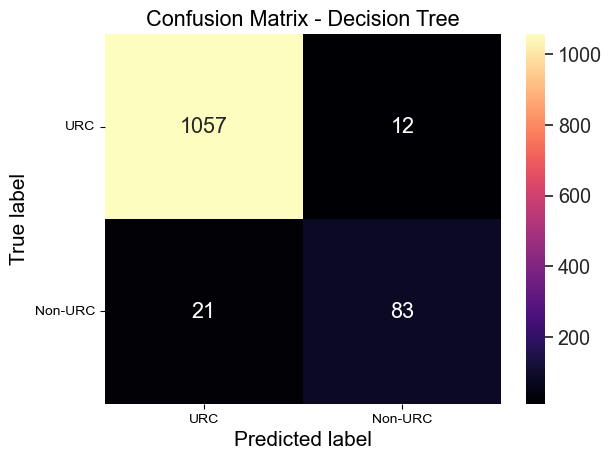

<Figure size 1500x1000 with 0 Axes>

In [112]:
# get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)

# turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
# set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['URC', 'Non-URC'])
ax.set_ylabel('True label', fontsize =15)
ax.set_yticklabels(['URC', 'Non-URC'], rotation = 0)
plt.show()

In [114]:
print(metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

     Non-URC       0.98      0.99      0.98      1069
         URC       0.87      0.80      0.83       104

    accuracy                           0.97      1173
   macro avg       0.93      0.89      0.91      1173
weighted avg       0.97      0.97      0.97      1173



In [120]:
# Check lengths of X and Y
if len(data_ver5_subset['Drug Class']) == 2498:
    data = data_ver5_subset.iloc[:2498]  # Trim the data to match the shorter length

# Assign features and target variable
Y = data_ver5_subset['Drug Class']
X = data_ver5_subset[['Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne']]

# Ensure X and Y have the same length
assert len(X) == len(Y)

# Training and Test set creation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Model fitting and evaluation
maxdepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

In [118]:
X_train, test_x, y_train, test_lab = train_test_split(X,Y, test_size= 0.2, random_state =1)

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(test_x)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_predTest))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(Y_test, Y_predTest, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(Y_test, Y_predTest, average='macro'))

# Model F1 Score: weighted average of precision and recall
print("F1 Score:", metrics.f1_score(Y_test, Y_predTest, average='macro'))

Accuracy: 0.9710391822827938
Precision: 0.8603591530420799
Recall: 0.9066848154869933
F1 Score: 0.8818619848701891


In [128]:
data_ver6.to_csv('drugs_side_effects_drugs_com_version_6.csv', index=False)

NameError: name 'data_ver6' is not defined

In [126]:
# Encode 'Drug Class' and 'Colds & Flu'
data_ver6['Drug Class'] = label_encoder.fit_transform(data_ver6['Drug Class'])
data_ver6['Colds & Flu'] = data_ver6['Colds & Flu'].astype(int)

# Prepare features and target variable
X = data_ver6[['Drug Class']]
y = data_ver6['Colds & Flu']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the model coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

NameError: name 'data_ver6' is not defined